import libraries

In [120]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns

In [135]:
songs = pd.read_csv('data/df_audio_features_1000.csv')
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


preparing and preprocessing data

In [79]:
# combine name and artist and id columns into a one column and drop html column
songs['name_artist'] = songs['name'] + ' -' + songs['artist']
songs.sample(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,name_artist
385,Bad Blood,Taylor Swift,0.652,0.8020,7,-6.114,1,0.1810,0.087100,0.000006,0.148,0.295,170.157,NaN,211933,4,0TvQLMecTE8utzoNmvXRbK,https://open.spotify.com/track/0TvQLMecTE8utzo...,Bad Blood -Taylor Swift
511,Muthaf**ka Up,Tyga,0.590,0.5420,9,-7.849,1,0.3290,0.001520,0.000000,0.364,0.480,122.482,NaN,233680,5,31VM9uxtem39xmT0dfDiSU,https://open.spotify.com/track/31VM9uxtem39xmT...,Muthaf**ka Up -Tyga
1085,I Will,Brian McBride,0.109,0.0522,8,-19.843,1,0.0357,0.976000,0.868000,0.108,0.032,76.376,NaN,344560,4,5WGoSnsHY26l4WTWX0L42t,https://open.spotify.com/track/5WGoSnsHY26l4WT...,I Will -Brian McBride
36,The Great Pretender,The Platters,0.425,0.4010,7,-9.427,1,0.0315,0.943000,0.000003,0.072,0.531,115.710,NaN,160667,3,2FkCjtQ1lYsf71s2FAS8hE,https://open.spotify.com/track/2FkCjtQ1lYsf71s...,The Great Pretender -The Platters
634,Paranoid,Black Sabbath,0.429,0.6310,4,-11.514,0,0.0769,0.000078,0.004110,0.175,0.376,162.734,NaN,168440,4,1jzDzZWeSDBg5fhNc3tczV,https://open.spotify.com/track/1jzDzZWeSDBg5fh...,Paranoid -Black Sabbath


#alternative ways to combine columns

# CONFIRMED WORKING methods
# with apply method and f string
songs['name_artist_id'] = songs.apply(lambda x: f"{x['song_name']} - {x['artist']} - {x['id']}", axis=1)

#with the str.cat() method
songs['name_artist_id'] = songs['song_name'].str.cat(songs['artist'], sep=' - ').str.cat(songs['id'], sep=' - ')
#or
songs['name_artist_id'] = songs['song_name'].str.cat([songs['artist'], songs['id']], sep=' - ')


#PRODUCE ERRORS OR INCORRECT OUTPUTS
# with join method. Error TypeError: sequence item 0: expected str instance, numpy.ndarray found
# songs['name_artist_id'] = ' - '.join(songs[['song_name', 'artist', 'id']].astype(str).values)

# with f string. Seems not correct because it shows the same value for all rows 0...
# songs['name_artist_id'] = f"{songs['song_name']} - {songs['artist']} - {songs['id']}"

In [82]:
#filter out html, song_name, artist, id columns
filtered_songs = songs.drop(['html', 'name', 'artist', 'id', 'type'], axis=1)

#ALTERNATIVELY
# Filter out columns with object data type. But in this case we also lose the name_artist_id column
# filtered_songs = songs.select_dtypes(exclude=['object'])

# OR
# filtered_songs = songs.drop(['html', 'name', 'artist', 'id'], axis=1).select_dtypes(exclude=['object'])

filtered_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist
0,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4,All Shook Up -Elvis Presley
1,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4,I've Got You Under My Skin - Remastered 1998 -...
2,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4,Smoke Gets In Your Eyes -The Platters
3,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,307053,4,"What'd I Say, Pt. 1 & 2 -Ray Charles"
4,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,185067,4,Dream A Little Dream Of Me -Ella Fitzgerald


In [83]:
#set the index to name_artist. Not name_artist_id like in 10_songs because I think it's easier to read and it is unique
filtered_songs.set_index('name_artist', inplace=True)
filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist,,,,,,,,,,,,,
Let Down -Easy Star All-Stars,0.746,0.5820,9,-6.283,1,0.0394,0.120,0.000024,0.0831,0.914,113.058,284387,4
Blue in Green (feat. John Coltrane & Bill Evans) -Miles Davis,0.421,0.0162,2,-25.358,0,0.0388,0.808,0.002400,0.0978,0.154,110.479,337733,4
Weaver Of Dreams - Remastered 2003/Rudy Van Gelder Edition -Freddie Hubbard,0.418,0.2270,4,-15.537,0,0.0379,0.912,0.822000,0.0956,0.210,103.586,395560,4


<AxesSubplot:>

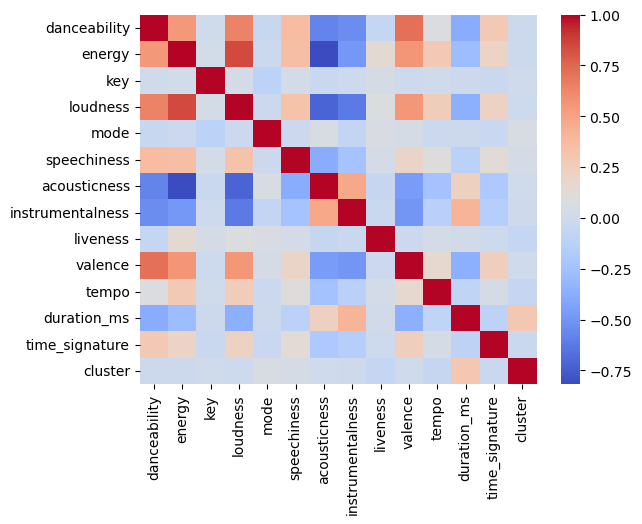

In [122]:
sns.heatmap(filtered_songs.corr(), cmap='coolwarm')

<AxesSubplot:xlabel='danceability', ylabel='energy'>

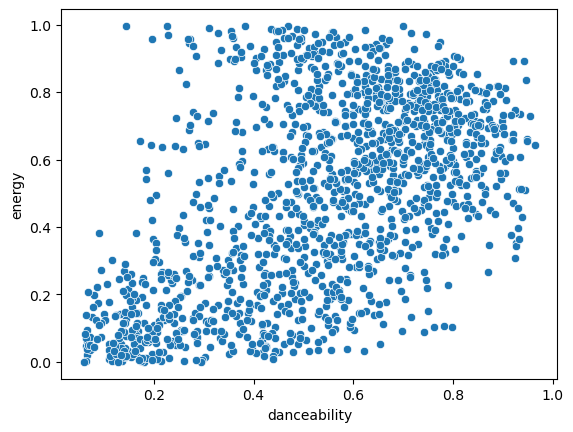

In [85]:
sns.scatterplot(x='danceability', y='energy', data=filtered_songs)

KMeans clustering

In [86]:
#import the model
from sklearn.cluster import KMeans

In [87]:
#initialize the model
my_kmeans = KMeans(n_clusters=5)

In [88]:
filtered_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, All Shook Up -Elvis Presley to Ravel: Boléro, M. 81 -Maurice Ravel
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1440 non-null   float64
 1   energy            1440 non-null   float64
 2   key               1440 non-null   int64  
 3   loudness          1440 non-null   float64
 4   mode              1440 non-null   int64  
 5   speechiness       1440 non-null   float64
 6   acousticness      1440 non-null   float64
 7   instrumentalness  1440 non-null   float64
 8   liveness          1440 non-null   float64
 9   valence           1440 non-null   float64
 10  tempo             1440 non-null   float64
 11  duration_ms       1440 non-null   int64  
 12  time_signature    1440 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 157.5+ KB


In [89]:
filtered_songs.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist,,,,,,,,,,,,,
All Shook Up -Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 -Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4
Smoke Gets In Your Eyes -The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4
"What'd I Say, Pt. 1 & 2 -Ray Charles",0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,307053,4
Dream A Little Dream Of Me -Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,185067,4


In [90]:
#drop column type as it contains Nan values. I dropped this column in filtering/dropping columns step above
# filtered_songs.drop('type', axis=1, inplace=True)

In [91]:
# fit the model to the data
my_kmeans.fit(filtered_songs)

KMeans(n_clusters=5)

In [92]:
#obtain the cluster labels. Predict the cluster for each data point
clusters = my_kmeans.predict(filtered_songs)

In [93]:
# attach the clusters to the original dataframe
# filtered_songs[&amp;amp;quot;cluster&amp;amp;quot;] =clusters
filtered_songs['cluster'] = clusters

In [94]:
filtered_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name_artist,,,,,,,,,,,,,,
All Shook Up -Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4,1
I've Got You Under My Skin - Remastered 1998 -Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4,1
Smoke Gets In Your Eyes -The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4,1
"What'd I Say, Pt. 1 & 2 -Ray Charles",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4,0
Dream A Little Dream Of Me -Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 -Pyotr Ilyich Tchaikovsky",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,3
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique -Tristan Murail",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,3
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) -Arnold Schoenberg",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,1


In [95]:
# using groupby method to learn average values for each cluste
filtered_songs.groupby('cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.425356,0.382573,5.128713,-14.655861,0.603960,0.063252,0.610851,0.399611,0.196798,0.328299,115.091083,3.994764e+05,3.844884
1,0.591414,0.545893,5.181478,-9.498188,0.677268,0.095137,0.406558,0.095881,0.168342,0.536287,116.131939,2.119139e+05,3.916745
2,0.157950,0.144012,3.562500,-21.252437,0.750000,0.043013,0.871250,0.731600,0.204500,0.060963,98.137000,1.438880e+06,3.562500
3,0.240846,0.195511,5.160000,-19.772420,0.700000,0.051848,0.820710,0.687893,0.160466,0.133250,103.951240,8.266827e+05,3.680000
4,0.183200,0.074050,7.500000,-29.108500,0.500000,0.042900,0.900500,0.867500,0.120000,0.052800,86.630000,3.703240e+06,4.000000


centroids  

In [101]:
# find out centroids
#before calculating cetrnoids you need to fit the model which has not been done yet
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.425356,0.382573,5.128713,-14.655861,0.603960,0.063252,0.610851,0.399611,0.196798,0.328299,115.091083,3.994764e+05,3.844884
1,0.591414,0.545893,5.181478,-9.498188,0.677268,0.095137,0.406558,0.095881,0.168342,0.536287,116.131939,2.119139e+05,3.916745
2,0.157950,0.144012,3.562500,-21.252437,0.750000,0.043013,0.871250,0.731600,0.204500,0.060963,98.137000,1.438880e+06,3.562500
3,0.240846,0.195511,5.160000,-19.772420,0.700000,0.051848,0.820710,0.687893,0.160466,0.133250,103.951240,8.266827e+05,3.680000
4,0.183200,0.074050,7.500000,-29.108500,0.500000,0.042900,0.900500,0.867500,0.120000,0.052800,86.630000,3.703240e+06,4.000000


<AxesSubplot:>

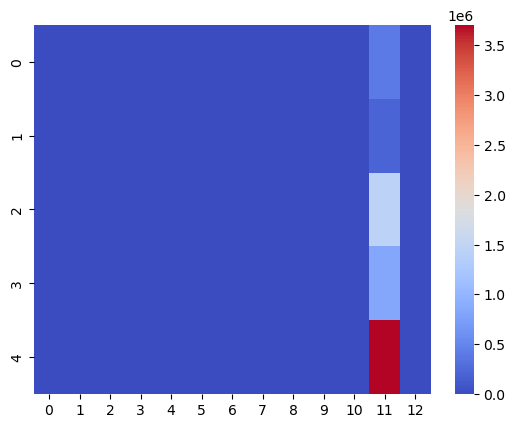

In [102]:
sns.heatmap(centroids, cmap='coolwarm')

In [100]:
centroids

array([[ 4.25356106e-01,  3.82572526e-01,  5.12871287e+00,
        -1.46558614e+01,  6.03960396e-01,  6.32518152e-02,
         6.10850634e-01,  3.99611252e-01,  1.96797690e-01,
         3.28299340e-01,  1.15091083e+02,  3.99476399e+05,
         3.84488449e+00],
       [ 5.91414219e-01,  5.45892769e-01,  5.18147802e+00,
        -9.49818803e+00,  6.77268475e-01,  9.51371375e-02,
         4.06557848e-01,  9.58806388e-02,  1.68342470e-01,
         5.36287091e-01,  1.16131939e+02,  2.11913917e+05,
         3.91674462e+00],
       [ 1.57950000e-01,  1.44012500e-01,  3.56250000e+00,
        -2.12524375e+01,  7.50000000e-01,  4.30125000e-02,
         8.71250000e-01,  7.31600000e-01,  2.04500000e-01,
         6.09625000e-02,  9.81370000e+01,  1.43888006e+06,
         3.56250000e+00],
       [ 2.40846000e-01,  1.95511400e-01,  5.16000000e+00,
        -1.97724200e+01,  7.00000000e-01,  5.18480000e-02,
         8.20710200e-01,  6.87893099e-01,  1.60466000e-01,
         1.33250000e-01,  1.03951240e

Elbow method and silhouette coefficient

<AxesSubplot:ylabel='cluster'>

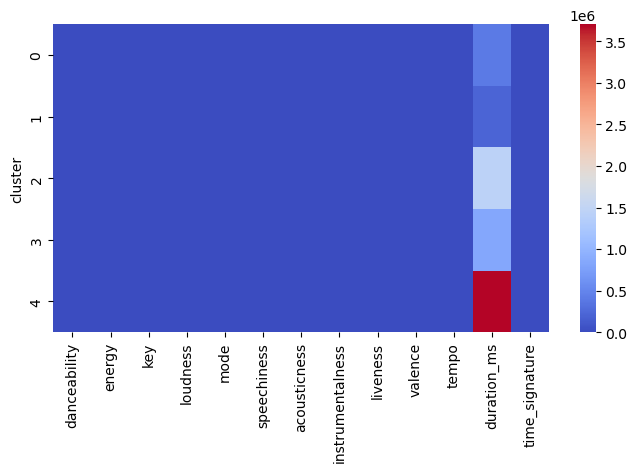

In [131]:
#Using group means produces the same results and graphs as using the centroids

import matplotlib.pyplot as plt

# plot with groupby method and mean
groups_means = filtered_songs.groupby('cluster').mean()

import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(groups_means, ax=ax, cmap='coolwarm')

In [103]:
from sklearn.cluster import KMeans

In [105]:
#access inertia score
inert_kmeans = KMeans(n_clusters=2)
inert_kmeans.fit(filtered_songs)
inert_kmeans.fit(filtered_songs)
inert_kmeans.inertia_

32294633545858.227

In [112]:
# for loop to find the optimal number of clusters. 
# for loop to compute the clustering for each value and append the inertia to a list

inertia_list = []
for i in range(1, 30):
    inert_kmeans = KMeans(n_clusters=i)
    inert_kmeans.fit(filtered_songs)
    inertia_list.append(round(inert_kmeans.inertia_))

inertia_list


[74865380331243,
 32294633545858,
 18745414034842,
 8785935124552,
 5897585234903,
 3840422365424,
 2521158132730,
 1960882565526,
 1557631137688,
 1266234957414,
 1019649893886,
 848253355891,
 727397701765,
 638098535266,
 535328001819,
 450977989466,
 401088012400,
 356092783759,
 318585362550,
 280476710044,
 258619541715,
 224729866379,
 202414493076,
 177729606949,
 164337966461,
 155280714840,
 136744405664,
 128600317975,
 116784727815]

silhouette coefficient

In [115]:
# compute the silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(filtered_songs, inert_kmeans.labels_)

0.5419482594890256

<AxesSubplot:ylabel='cluster'>

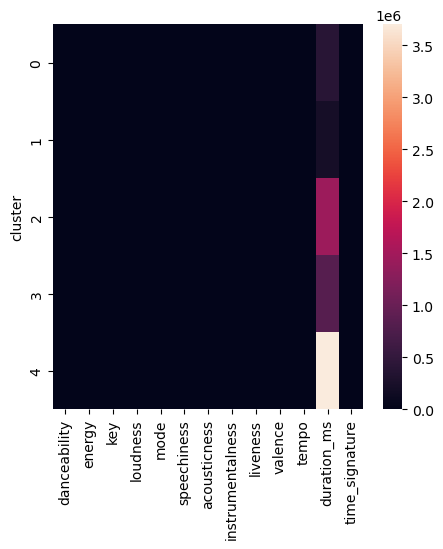

In [137]:
# plot with groupby method and mean
groups_means = filtered_songs.groupby('cluster').mean()

import seaborn as sns
plt.subplots(figsize=(5, 5))
sns.heatmap(groups_means)